# Pipelines

EvalML pipelines represent a sequence of operations to be applied to data, specifically transformations followed by ML model algorithms.

A pipeline class holds a combination of one or more components, which will be applied to new input data in sequence.

Each component and pipeline class supports a set of parameters which configure its behavior. The AutoML search process seeks to find the combination of pipeline structure and pipeline parameters which perform the best on the data.

## Class Definition
Pipeline definitions must inherit from the proper pipeline base class, `RegressionPipeline`, `BinaryClassificationPipeline` or `MulticlassClassificationPipeline`. They must also include a `component_graph` list as a class variable containing the sequence of components to be fit and evaluated. Each component in the graph can be provided as either a string name or as a reference to the component class.

In [21]:
from evalml.pipelines import MulticlassClassificationPipeline

class CustomMulticlassClassificationPipeline(MulticlassClassificationPipeline):
    component_graph = ['Simple Imputer', 'One Hot Encoder', 'Logistic Regression Classifier']

## Pipeline Usage

All pipelines define the following methods:
* `fit` fits each component on the provided training data, in order.
* `predict` computes the predictions of the component graph on the provided data.
* `score` computes the value of [an objective](user_guide/objectives) on the provided data.

In [22]:
from evalml.demos import load_wine
X, y = load_wine()

pipeline = CustomMulticlassClassificationPipeline({})
pipeline.fit(X, y)
print(pipeline.predict(X))
print(pipeline.score(X, y, objectives=['log_loss_multi']))

0      0
1      0
2      0
3      0
4      1
      ..
173    2
174    2
175    2
176    2
177    2
Length: 178, dtype: int64
OrderedDict([('Log Loss Multiclass', 0.10008108112956192)])


## Custom Name
By default, a pipeline class's name property is the result of adding spaces between each Pascal case capitalization in the class name. E.g. `LogisticRegressionPipeline.name` will return 'Logistic Regression Pipeline'. Therefore, we suggest custom pipelines use Pascal case for their class names.

If you'd like to override the pipeline classes name attribute so it isn't derived from the class name, you can set the custom_name attribute, like so:

In [23]:
from evalml.pipelines import MulticlassClassificationPipeline

class CustomPipeline(MulticlassClassificationPipeline):
    component_graph = ['Simple Imputer', 'One Hot Encoder', 'Logistic Regression Classifier']
    custom_name = 'A custom pipeline name'
    
print(CustomPipeline.name)

A custom pipeline name


## Override Component Hyperparameter Ranges
To specify custom hyperparameter ranges, set the `custom_hyperparameters` property to be a dictionary where each key-value pair consists of a parameter name and range. AutoML will use this dictionary to override the hyperparameter ranges collected from each component in the component graph.

In [2]:
class CustomPipeline(MulticlassClassificationPipeline):
    component_graph = ['Simple Imputer', 'One Hot Encoder', 'Standard Scaler', 'Logistic Regression Classifier']

print("Without custom hyperparameters:")
print(CustomPipeline.hyperparameters)  
    
class CustomPipeline(MulticlassClassificationPipeline):
        component_graph = ['Simple Imputer', 'One Hot Encoder', 'Standard Scaler', 'Logistic Regression Classifier']
        custom_hyperparameters = {
        'Simple Imputer' : {
            'impute_strategy': ['most_frequent']
        }
    }

print()
print("With custom hyperparameters:")
print(CustomPipeline.hyperparameters)

Without custom hyperparameters:
{'Simple Imputer': {'impute_strategy': ['mean', 'median', 'most_frequent']}, 'One Hot Encoder': {}, 'Standard Scaler': {}, 'Logistic Regression Classifier': {'penalty': ['l2'], 'C': Real(low=0.01, high=10, prior='uniform', transform='identity')}}

With custom hyperparameters:
{'Simple Imputer': {'impute_strategy': ['most_frequent']}, 'One Hot Encoder': {}, 'Standard Scaler': {}, 'Logistic Regression Classifier': {'penalty': ['l2'], 'C': Real(low=0.01, high=10, prior='uniform', transform='identity')}}


To initialize our new custom pipeline class, we must pass in a `parameters` argument. If we want to use the defaults for each component, we can simply pass in an empty dictionary.

In [3]:
CustomPipeline(parameters={})

## Pipeline Parameters
You can also pass in custom parameters. The parameters dictionary needs to be in the format of a two-layered dictionary where the first key-value pair is the component name and component parameters dictionary. The component parameters dictionary consists of a key value pair of parameter name and parameter values. An example will be shown below and component parameters can be found [here](../api_reference.rst#components).

In [4]:
parameters = {
        'Simple Imputer': {
            'impute_strategy': 'mean'
        },
        'Logistic Regression Classifier': {
            'penalty': 'l2',
            'C': 1.0,
        }
    }

cp = CustomPipeline(parameters=parameters, random_state=5)


## Pipeline Description

You can call `.graph()` to see each component and its parameters. Each component takes in data and feeds it to the next.

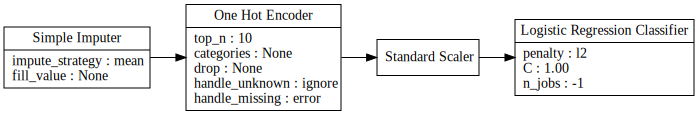

In [5]:
cp.graph()

You can see more detailed information by calling `.describe()`:

In [6]:
cp.describe()

*******************
* Custom Pipeline *
*******************

Problem Type: Multiclass Classification
Model Family: Linear

Pipeline Steps
1. Simple Imputer
	 * impute_strategy : mean
	 * fill_value : None
2. One Hot Encoder
	 * top_n : 10
	 * categories : None
	 * drop : None
	 * handle_unknown : ignore
	 * handle_missing : error
3. Standard Scaler
4. Logistic Regression Classifier
	 * penalty : l2
	 * C : 1.0
	 * n_jobs : -1
